In [1]:
!ls

246 Project.pdf
SBA Loan data .xlsx
SBA Loan database variable description.pdf
mse246Proj.ipynb
~$SBA Loan data .xlsx


In [1]:
import pandas as pd
df = pd.read_excel("SBA Loan data .xlsx")

In [4]:
df.head()

,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,...,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,ProjectCounty,ProjectState,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount
0,504,ROBERT G. FIELDS AND MARY D. F,55 & RICHLAND,KANSAS CITY,KS,66106,Avenue Area Incorporated,3324 Emerald Lane,Jefferson City,MO,...,NaN,12,NaN,NaN,WYANDOTTE,KS,INDIVIDUAL,PIF,NaT,0.0
1,504,CANDLELAMP COMPANY,3454 NIKI WAY,RIVERSIDE,CA,92507,CDC Small Business Finance Cor,2448 Historic Decatur,San Diego,CA,...,NaN,240,NaN,NaN,RIVERSIDE,CA,INDIVIDUAL,PIF,NaT,0.0
2,504,"NATIONAL COMPOSITES, INC.",2303 N. BENDIX DRIVE,SOUTH BEND,IN,46628,Business Development Corporati,218 W. Washington Street,South Bend,IN,...,NaN,120,NaN,NaN,ST JOSEPH,IN,CORPORATION,PIF,NaT,0.0
3,504,WENDY'S OF HARRISBURG,OUTLOT A. TR. 45N & SMALL ST,HARRISBURG,IL,62946,Small Business Growth Corporat,2401 West White Oaks Drive,Springfield,IL,...,NaN,240,NaN,NaN,SALINE,IL,CORPORATION,CHGOFF,2003-03-28,0.0
4,504,"RON SAUNORIS GARDEN CTR, INC.",13747 W. 159TH ST.,LOCKPORT,IL,60441,MISSNG/INACTV LENDER,NaN,NaN,NaN,...,NaN,240,NaN,NaN,WILL,IL,CORPORATION,CANCLD,NaT,0.0


## Data cleaning
Data cleaning: we remove loans that are exempt from reporting (which are still outstanding) or were canceled, with loss severity greater than one, zero term, and other inconsistent entries

1. remove outstanding/ canceled loans
2. loan severity>1
3. zero term

## Imputation/Nan
1. ThirdPartyDollars: Nan ==> 0
2.

## Useful columns
["ThirdPartyDollars","GrossApproval","InitialInterestRate",\
"TermInMonths","NaicsCode","BusinessType","LoanStatus","ChargeOffDate","GrossChargeOffAmount"]

In [2]:
df.ThirdPartyDollars.fillna(0, inplace=True)
df= df[(df.LoanStatus == "PIF") | (df.LoanStatus == "CHGOFF")]
df = df[df.GrossChargeOffAmount<=(df.ThirdPartyDollars+df.GrossApproval)]
df = df[df.TermInMonths>0]

In [95]:
df.head()

,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,...,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,ProjectCounty,ProjectState,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount
0,504,ROBERT G. FIELDS AND MARY D. F,55 & RICHLAND,KANSAS CITY,KS,66106,Avenue Area Incorporated,3324 Emerald Lane,Jefferson City,MO,...,NaN,12,NaN,NaN,WYANDOTTE,KS,INDIVIDUAL,PIF,NaT,0.0
1,504,CANDLELAMP COMPANY,3454 NIKI WAY,RIVERSIDE,CA,92507,CDC Small Business Finance Cor,2448 Historic Decatur,San Diego,CA,...,NaN,240,NaN,NaN,RIVERSIDE,CA,INDIVIDUAL,PIF,NaT,0.0
2,504,"NATIONAL COMPOSITES, INC.",2303 N. BENDIX DRIVE,SOUTH BEND,IN,46628,Business Development Corporati,218 W. Washington Street,South Bend,IN,...,NaN,120,NaN,NaN,ST JOSEPH,IN,CORPORATION,PIF,NaT,0.0
3,504,WENDY'S OF HARRISBURG,OUTLOT A. TR. 45N & SMALL ST,HARRISBURG,IL,62946,Small Business Growth Corporat,2401 West White Oaks Drive,Springfield,IL,...,NaN,240,NaN,NaN,SALINE,IL,CORPORATION,CHGOFF,2003-03-28,0.0
6,504,"ROCKY MTN EMPLOYE BENEFTS, INC",3200 S. 700 E.,SALT LAKE CITY,UT,84106,Mountain West Small Business F,2595 East 3300 South,Salt Lake City,UT,...,NaN,240,NaN,NaN,SALT LAKE,UT,CORPORATION,PIF,NaT,0.0


In [5]:
df.columns

Index(['Program', 'BorrName', 'BorrStreet', 'BorrCity', 'BorrState', 'BorrZip',
       'CDC_Name', 'CDC_Street', 'CDC_City', 'CDC_State', 'CDC_Zip',
       'ThirdPartyLender_Name', 'ThirdPartyLender_City',
       'ThirdPartyLender_State', 'ThirdPartyDollars', 'GrossApproval',
       'ApprovalDate', 'ApprovalFiscalYear', 'DeliveryMethod', 'subpgmdesc',
       'InitialInterestRate', 'TermInMonths', 'NaicsCode', 'NaicsDescription',
       'ProjectCounty', 'ProjectState', 'BusinessType', 'LoanStatus',
       'ChargeOffDate', 'GrossChargeOffAmount'],
      dtype='object')

In [3]:
s = set()
naics_mapping = {}
ls = df[['NaicsCode', 'NaicsDescription']].values
for row in ls:
    num,des = row
    num = str(num)
    if num == "nan":
        continue
    if num == "NaN":
        continue
    # print(type(num))
    num = int(float(num))
    naics_mapping[num] = des

In [4]:
naics_mapping

{512110: 'Motion Picture and Video Production',
 235420: 'Drywall, Plastering, Acoustical, and Insulation Contractors',
 622110: 'General Medical and Surgical Hospitals',
 313320: 'Fabric Coating Mills',
 812331: 'Linen Supply',
 444130: 'Hardware Stores',
 621210: 'Offices of Dentists',
 422210: "Drugs and Druggists' Sundries Wholesalers",
 421910: 'Sporting and Recreational Goods and Supplies Wholesalers',
 235110: 'Plumbing, Heating, and Air Conditioning Contractors',
 453110: 'Florists',
 336212: 'Truck Trailer Manufacturing',
 441210: 'Recreational Vehicle Dealers',
 421830: 'Industrial Machinery and Equipment Wholesalers',
 332813: 'Electroplating, Plating, Polishing, Anodizing, and Coloring',
 451110: 'Sporting Goods Stores',
 541430: 'Graphic Design Services',
 441110: 'New Car Dealers',
 235310: 'Electrical Contractors',
 333911: 'Pump and Pumping Equipment Manufacturing',
 337214: 'Office Furniture (except Wood) Manufacturing',
 313210: 'Broadwoven Fabric Mills',
 332111: 'Ir

## Default rate

Page 12 notes. ratio of the
number of loans charged of during a year to the number of loans
at risk at the beginning of the year

columns 
1. ChargeOffDate
2. ApprovalDate
3. TermInMonths

In [5]:
def_df = df[df.LoanStatus == "CHGOFF"]
ndef_df = df[df.LoanStatus != "CHGOFF"]

In [6]:
ls = def_df.ChargeOffDate.dt.year.unique()
ls.sort()
default = {}
for year in ls:
    default[year]= len(def_df[def_df.ChargeOffDate.dt.year==year])

In [11]:
# Importing required modules
from dateutil.relativedelta import relativedelta

# Defining the function
def add_months(start_date, delta_period):
    #print(delta_period)
    end_date = start_date + relativedelta(months=delta_period)
    return end_date

ndef_df["end_date"] = ndef_df.apply(lambda row: add_months(row["ApprovalDate"], row["TermInMonths"]), axis = 1)
# ndef_df["end_date"] = ndef_df.ApprovalDate+pd.DateOffset(months=ndef_df.TermInMonths)

<ipython-input-11-8bdbdefbec6f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndef_df["end_date"] = ndef_df.apply(lambda row: add_months(row["ApprovalDate"], row["TermInMonths"]), axis = 1)


In [20]:
date = pd.date_range('1/1/2000', '12/1/2020', freq='BAS')[0]

In [23]:
date.year

2000

In [159]:
#ndef_df.drop(ndef_df.tail(1).index,inplace=True)

KeyError: '[140496] not found in axis'

In [16]:
date = pd.date_range('1/1/2000', '12/1/2020', freq='BAS')[0]
ndef_df["between"] = ((ndef_df.ApprovalDate<= date) & (ndef_df.end_date>= date))

<ipython-input-16-62928d2b2b60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndef_df["between"] = ((ndef_df.ApprovalDate<= date) & (ndef_df.end_date>= date))


In [24]:
defRate = {}
for date in pd.date_range('1/1/1990', '12/1/2014', freq='BAS'):
    if date.year in default:
        numDef = default[date.year]
    else:
        numDef = 0
        
    if numDef == 0:
        defRate[date.year]=0
        continue
    ndef_df["between"] = ((ndef_df.ApprovalDate<= date) & (ndef_df.end_date>= date))
    numNoDef = len(ndef_df[ndef_df["between"]==True])
    defRate[date.year] = numDef/(numDef+numNoDef)
    
    

<ipython-input-24-2c7654438fa2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndef_df["between"] = ((ndef_df.ApprovalDate<= date) & (ndef_df.end_date>= date))
<ipython-input-24-2c7654438fa2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndef_df["between"] = ((ndef_df.ApprovalDate<= date) & (ndef_df.end_date>= date))
<ipython-input-24-2c7654438fa2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [25]:
defRate

{1990: 0,
 1991: 0,
 1992: 0.002317497103128621,
 1993: 0.002050580997949419,
 1994: 0.00224517287831163,
 1995: 0.002057189878625797,
 1996: 0.002716366105787369,
 1997: 0.003133393017009848,
 1998: 0.0030084523184184136,
 1999: 0.0039027195793279105,
 2000: 0.002032372795238441,
 2001: 0.003032827862022996,
 2002: 0.0041823121775498365,
 2003: 0.004525917281033845,
 2004: 0.005089126322240282,
 2005: 0.0029990675168225004,
 2006: 0.0034249879401833092,
 2007: 0.004980617878538706,
 2008: 0.0133934703969962,
 2009: 0.01733188523848312,
 2010: 0.026716025154988627,
 2011: 0.03414303468534629,
 2012: 0.04470496107605141,
 2013: 0.03421960822437175,
 2014: 0.001993567422450227,
 2015: 0}

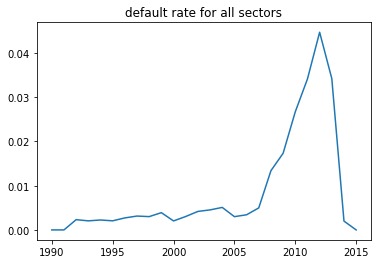

In [28]:
import matplotlib.pylab as plt

lists = sorted(defRate.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.title("default rate for all sectors")
plt.show()


In [2]:
import pandas as pd

In [3]:
print(pd.__version__)

1.1.3


<ipython-input-36-5e5e76b38eec>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_no_df["between"] = ((temp_no_df.ApprovalDate<= date) & (temp_no_df.end_date>= date))
<ipython-input-36-5e5e76b38eec>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_no_df["between"] = ((temp_no_df.ApprovalDate<= date) & (temp_no_df.end_date>= date))
<ipython-input-36-5e5e76b38eec>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

<ipython-input-36-5e5e76b38eec>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_no_df["between"] = ((temp_no_df.ApprovalDate<= date) & (temp_no_df.end_date>= date))
<ipython-input-36-5e5e76b38eec>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_no_df["between"] = ((temp_no_df.ApprovalDate<= date) & (temp_no_df.end_date>= date))
<ipython-input-36-5e5e76b38eec>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

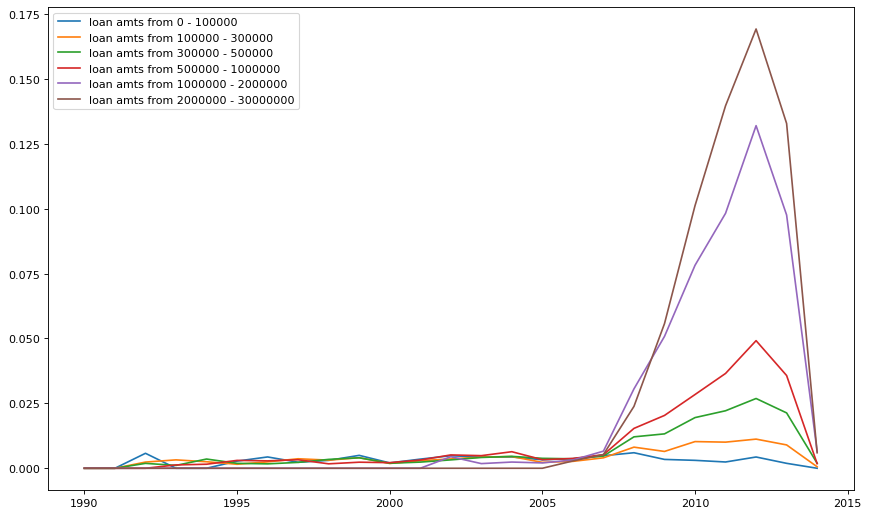

In [36]:
loan_amts = [0,100000,300000,500000,1000000,2000000,30000000]
plt.figure(figsize=(13, 8), dpi=80)
for ind in range(len(loan_amts)-1):
    small = loan_amts[ind]
    big = loan_amts[ind+1]
    defRate = {}
    temp_no_df = ndef_df[(ndef_df.ThirdPartyDollars+ndef_df.GrossApproval>small) & (ndef_df.ThirdPartyDollars+ndef_df.GrossApproval<=big)]
    temp_df = def_df[(def_df.ThirdPartyDollars+def_df.GrossApproval>small) & (def_df.ThirdPartyDollars+def_df.GrossApproval<big)]
    for date in pd.date_range('1/1/1990', '12/1/2014', freq='BAS'):
        year = date.year
        numDef = len(temp_df[temp_df.ChargeOffDate.dt.year==year])
        if numDef == 0:
            defRate[date.year]=0
            continue
            
        temp_no_df["between"] = ((temp_no_df.ApprovalDate<= date) & (temp_no_df.end_date>= date))
        numNoDef = len(temp_no_df[temp_no_df["between"]==True])
        defRate[date.year] = numDef/(numDef+numNoDef)
    lists = sorted(defRate.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y, label = "loan amts from {} - {}".format(small,big))

plt.legend()
    

In [47]:
pd.date_range('1/1/1990', '12/1/2014', freq='BAS')[-3]

Timestamp('2012-01-02 00:00:00', freq='BAS-JAN')

In [48]:
date = pd.date_range('1/1/1990', '12/1/2014', freq='BAS')[-3]
ndef_df["between"] = ((ndef_df.ApprovalDate<= date) & (ndef_df.end_date>= date))

<ipython-input-48-66a094cc052c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndef_df["between"] = ((ndef_df.ApprovalDate<= date) & (ndef_df.end_date>= date))


In [44]:
def_df[(def_df.ChargeOffDate.dt.year==2012) & (def_df.ThirdPartyDollars+def_df.GrossApproval>=2e6)][["ChargeOffDate","ThirdPartyDollars","GrossApproval"]]

,ChargeOffDate,ThirdPartyDollars,GrossApproval
52739,2012-09-11,2438000.0,1300000
54889,2012-10-01,1500000.0,1133000
55220,2012-05-12,3130000.0,1300000
55801,2012-03-02,1400000.0,866000
56918,2012-03-08,2735000.0,1300000
...,...,...,...
111818,2012-12-10,5823000.0,3520000
113062,2012-06-30,2397500.0,1693000
114006,2012-02-01,2193000.0,1548000
115798,2012-12-18,2932885.0,2954000


In [ ]:
date = pd.date_range('1/1/1990', '12/1/2014', freq='BAS')[-3]
ndef_df["between"] = ((ndef_df.ApprovalDate<= date) & (ndef_df.end_date>= date))

In [50]:
ndef_df[(ndef_df["between"]==True) & (ndef_df.ThirdPartyDollars+ndef_df.GrossApproval>=2e6)][["ApprovalDate","TermInMonths","between"]+["ThirdPartyDollars","GrossApproval"]]

,ApprovalDate,TermInMonths,between,ThirdPartyDollars,GrossApproval
47502,2001-12-14,240,True,1265000.0,947000
48318,2002-02-13,240,True,1766809.0,999000
49692,2002-05-15,240,True,1186084.0,978000
51540,2002-09-10,240,True,2400000.0,825000
51620,2002-09-13,240,True,1166926.0,903000
...,...,...,...,...,...
129414,2011-11-30,240,True,2410950.0,1736000
129791,2011-12-13,240,True,1212500.0,996000
129979,2011-12-20,240,True,2035500.0,1674000
130189,2011-12-29,240,True,2905000.0,2570000


In [30]:
ndef_df.columns

Index(['Program', 'BorrName', 'BorrStreet', 'BorrCity', 'BorrState', 'BorrZip',
       'CDC_Name', 'CDC_Street', 'CDC_City', 'CDC_State', 'CDC_Zip',
       'ThirdPartyLender_Name', 'ThirdPartyLender_City',
       'ThirdPartyLender_State', 'ThirdPartyDollars', 'GrossApproval',
       'ApprovalDate', 'ApprovalFiscalYear', 'DeliveryMethod', 'subpgmdesc',
       'InitialInterestRate', 'TermInMonths', 'NaicsCode', 'NaicsDescription',
       'ProjectCounty', 'ProjectState', 'BusinessType', 'LoanStatus',
       'ChargeOffDate', 'GrossChargeOffAmount', 'end_date', 'between'],
      dtype='object')

In [19]:
ndef_df[ndef_df["between"]==True][["ApprovalDate","end_date","TermInMonths","between"]]

,ApprovalDate,end_date,TermInMonths,between
1,1990-01-02,2010-01-02,240,True
2,1990-01-03,2000-01-03,120,True
6,1990-01-03,2010-01-03,240,True
7,1990-01-03,2010-01-03,240,True
8,1990-01-03,2010-01-03,240,True
...,...,...,...,...
37844,2000-01-03,2020-01-03,240,True
37846,2000-01-03,2020-01-03,240,True
37848,2000-01-03,2020-01-03,240,True
37852,2000-01-03,2020-01-03,240,True


In [13]:
ndef_df[["ApprovalDate","end_date","TermInMonths"]]

,ApprovalDate,end_date,TermInMonths
0,1990-01-02,1991-01-02,12
1,1990-01-02,2010-01-02,240
2,1990-01-03,2000-01-03,120
6,1990-01-03,2010-01-03,240
7,1990-01-03,2010-01-03,240
...,...,...,...
137083,2012-09-12,2032-09-12,240
137439,2012-09-21,2032-09-21,240
137586,2012-09-25,2022-09-25,120
138052,2012-10-10,2032-10-10,240


In [ ]:
## 

notDefault = {}

## Useful
* third part dollars
* gross approval
* delivery method???
* initial interest rate
* terms duration(in months)
* naics??? (sectors)
* laon status
* chargeoffdate
* GrosschargeOffAmt

## maybe useful
* approve date(???)

## Not useful columns

* Program: just a single value of 504
* BorrName: Name of borrower
* BorrStreet: who cares about the street
* NaicsDescription: this is just naicsCode, with description, stored in dict
* CDC_Street: uselss
* third party lender: 2.3k unique
* 

Might be useful
* CDC_Name, 296 distinct out of 50k


In [72]:
df.columns

Index(['Program', 'BorrName', 'BorrStreet', 'BorrCity', 'BorrState', 'BorrZip',
       'CDC_Name', 'CDC_Street', 'CDC_City', 'CDC_State', 'CDC_Zip',
       'ThirdPartyLender_Name', 'ThirdPartyLender_City',
       'ThirdPartyLender_State', 'ThirdPartyDollars', 'GrossApproval',
       'ApprovalDate', 'ApprovalFiscalYear', 'DeliveryMethod', 'subpgmdesc',
       'InitialInterestRate', 'TermInMonths', 'NaicsCode', 'NaicsDescription',
       'ProjectCounty', 'ProjectState', 'BusinessType', 'LoanStatus',
       'ChargeOffDate', 'GrossChargeOffAmount'],
      dtype='object')

In [74]:
df2 = df[["ThirdPartyDollars","GrossApproval","InitialInterestRate","TermInMonths","NaicsCode","BusinessType","LoanStatus","ChargeOffDate","GrossChargeOffAmount"]]

In [75]:
df2.head()

,ThirdPartyDollars,GrossApproval,InitialInterestRate,TermInMonths,NaicsCode,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount
0,NaN,166000,NaN,12,nan,INDIVIDUAL,PIF,NaT,0.0
1,NaN,117000,NaN,240,nan,INDIVIDUAL,PIF,NaT,0.0
2,NaN,261000,NaN,120,nan,CORPORATION,PIF,NaT,0.0
3,NaN,262000,NaN,240,nan,CORPORATION,CHGOFF,2003-03-28,0.0
6,NaN,154000,NaN,240,nan,CORPORATION,PIF,NaT,0.0


In [76]:
df2[df2.ThirdPartyDollars>0]

,ThirdPartyDollars,GrossApproval,InitialInterestRate,TermInMonths,NaicsCode,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount
46833,227719.0,279000,NaN,240,422210.0,CORPORATION,PIF,NaT,0.0
47502,1265000.0,947000,NaN,240,621111.0,CORPORATION,PIF,NaT,0.0
47520,2198888.0,1243000,NaN,240,721110.0,CORPORATION,CHGOFF,2011-04-08,1117812.0
47830,975000.0,803000,NaN,240,531210.0,CORPORATION,CHGOFF,2012-05-03,531844.0
47914,841000.0,746000,NaN,240,337127.0,CORPORATION,CHGOFF,2012-12-14,410900.0
...,...,...,...,...,...,...,...,...,...
137083,505000.0,521000,3.25,240,441110.0,CORPORATION,PIF,NaT,0.0
137439,450000.0,444000,3.25,240,722110.0,CORPORATION,PIF,NaT,0.0
137586,300000.0,311000,3.25,120,333220.0,CORPORATION,PIF,NaT,0.0
138052,625000.0,517000,3.25,240,238210.0,CORPORATION,PIF,NaT,0.0


Data cleaning: we remove loans that are exempt from reporting
(which are still outstanding) or were canceled, with loss severity
greater than one, zero term, and other inconsistent entries

In [78]:
df2[df2.TermInMonths ==0]

,ThirdPartyDollars,GrossApproval,InitialInterestRate,TermInMonths,NaicsCode,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount


In [84]:
df2[df2.GrossChargeOffAmount>df2.GrossApproval]

,ThirdPartyDollars,GrossApproval,InitialInterestRate,TermInMonths,NaicsCode,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount
10678,NaN,471000,NaN,120,nan,CORPORATION,CHGOFF,2008-06-10,471215.0
11559,NaN,521000,NaN,240,nan,CORPORATION,CHGOFF,2005-08-17,980844.0
13689,NaN,353000,NaN,240,nan,CORPORATION,CHGOFF,2013-02-22,376932.0
16319,NaN,470000,NaN,240,nan,CORPORATION,CHGOFF,2011-06-22,530456.0
21273,NaN,272000,NaN,240,nan,CORPORATION,CHGOFF,2012-03-28,335625.0
...,...,...,...,...,...,...,...,...,...
101080,102600.0,87000,NaN,240,238220.0,CORPORATION,CHGOFF,2010-12-16,88136.0
101171,774250.0,636000,NaN,240,722110.0,CORPORATION,CHGOFF,2013-06-06,670867.0
102781,362500.0,300000,NaN,240,722110.0,CORPORATION,CHGOFF,2011-11-17,302309.0
104657,75000.0,64000,NaN,240,722410.0,INDIVIDUAL,CHGOFF,2011-11-15,64424.0
